# Seismic Activity and Impact Assessment: A Continental Analysis of Earthquakes in the Past Year
- Elis Davies
- 201479619
- Word count: 1230

In [1]:
# Import libraries
## Importing the pandas library for data manipulation and analysis
import pandas as pd

## Importing the numpy library for numerical operations
import numpy as np

## Importing seaborn for statistical data visualization
import seaborn as sns

## Importing matplotlib.pyplot for creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt

## Importing missingno to visualize missing data within a dataset
import missingno as msno

## Importing Nominatim from geopy for geocoding (converting addresses into geographic coordinates)
from geopy.geocoders import Nominatim

## Importing RateLimiter from geopy to manage API request rates when using geocoding services
from geopy.extra.rate_limiter import RateLimiter

## Importing pycountry_convert to convert country names to continent codes
import pycountry_convert as pc

## Importing Tuple from typing to specify the types of return values for functions (helps with type hinting)
from typing import Tuple

## Importing tqdm to display progress bars in loops, useful for tracking progress in data processing tasks
from tqdm import tqdm
tqdm.pandas()

## Importing tabulate to easily print tables
from tabulate import tabulate

## Importing warnings so no warnings are displayed when exporting to a HTML file
import warnings
warnings.filterwarnings('ignore')

## Introduction
Earthquakes rank among the most terrifying and dangerous natural disasters (Krichen 2024). They typically happen without any warning, and the aftershocks can persist for days, weeks, or months. The impact can vary widely, resulting in strong tremors, fires, landslides, and soil liquefaction. Every year, millions of earthquakes are recorded globally, with around 20,000 of them being significant to pinpoint, and on average, over 1,300 reaching a magnitude greater than 5, which can lead to damage (Cassidy, 2016). As the global population continues to grow, the number of casualties and losses from earthquakes is increasing rapidly (Tang *et al*., 2019).

Analysing earthquake data assists to understand seismic patterns, assessing risks, and improving safety measures. While also identifying vulnerable areas, e.g. highly populated areas that are continually hit by earthquakes, informs engineering practices and building codes, and aids in developing early warning systems (Contreras, Wilkinson, James, 2021).

Earthquakes can occur anywhere but, mainly along plate boundaries. The tremors from oceanic events are not usually felt by people, and usually produce secondary hazards, for example, tsunamis (Jain, 2014). As this investigation is focusing on direct hazards, i.e. tremors, these ocean events will be excluded.

### Aims
- Identify and remove any missing data that will restrict answering the investigation's overall question.
- Identify those events that are more likely to cause damage, which according to Cassidy (2016) and [USGS](https://www.usgs.gov/faqs/what-magnitude-does-damage-begin-occur-earthquake), are magnitudes 5 or greater.
- Using data visualisations, identify the continents with the greatest number of events.

## Data
The dataset used in this analysis is the ['Global Earthquake Data' from kaggle.com](https://www.kaggle.com/datasets/shreyasur965/recent-earthquakes/data). It contains a total of 1,137 traceable earthquake events dating from 23-06-2023 to 19-09-2024, the dataset is a slice of a much larger table of over 4 million events which are collected from the USGS, which is accessed through an [API](https://rapidapi.com/dbarkman/api/everyearthquake). For every event there are 43 attributes. Only four of these attributes will be kept:
- Magnitude of each event
- Significance of the earthquake, which is a score based on magnitude and impact.
- Latitude and longitude to locate the continent where each event took place.

### Exploratory Data Analysis & Interpretation

In [2]:
# Read in the dataFrame to a variable called 'earthquakes'
earthquakes = pd.read_csv("./data/earthquake/earthquakes.csv")

# Inspect the dataFrame to see all the columns it contains
earthquakes.head()

,id,magnitude,type,title,date,time,updated,url,detailUrl,felt,...,location,continent,country,subnational,city,locality,postcode,what3words,timezone,locationDetails
0,us7000necw,4.8,earthquake,"M 4.8 - 33 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182289,1726583895255,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,1893,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79783.0,landmass.perkily.affords,-300,"[{'id': '80684', 'wikidataId': '', 'name': '79..."
1,tx2024shcj,5.1,earthquake,"M 5.1 - 34 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182183,1726672002991,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,2042,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79331.0,escalator.grownups.dwell,-300,"[{'id': '89341', 'wikidataId': '', 'name': '48..."
2,ci40734823,3.7,earthquake,"M 3.7 - 6 km N of Malibu, CA",2024-09-16T11:22:08,1726485728190,1726637414586,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,1580,...,"Malibu, CA",North America,United States of America (the),California,Los Angeles,Agoura Hills-Malibu,90265.0,clocking.uploaded.issuer,-420,"[{'id': '93478', 'wikidataId': 'Q844837', 'nam..."
3,tx2024scvz,3.9,earthquake,"M 3.9 - 58 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266539,1726584426218,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,5,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,sailboats.sawn.speeding,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."
4,us7000ndte,4.1,earthquake,"M 4.1 - 60 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266382,1726334616179,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,4,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,spinners.downtime.computes,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."


From the output above, the dataset contains a lot of columns that are not needed for this analysis, e.g. url, detailurl, status, tsunami etc. Therefore, only the columns needed will be kept.

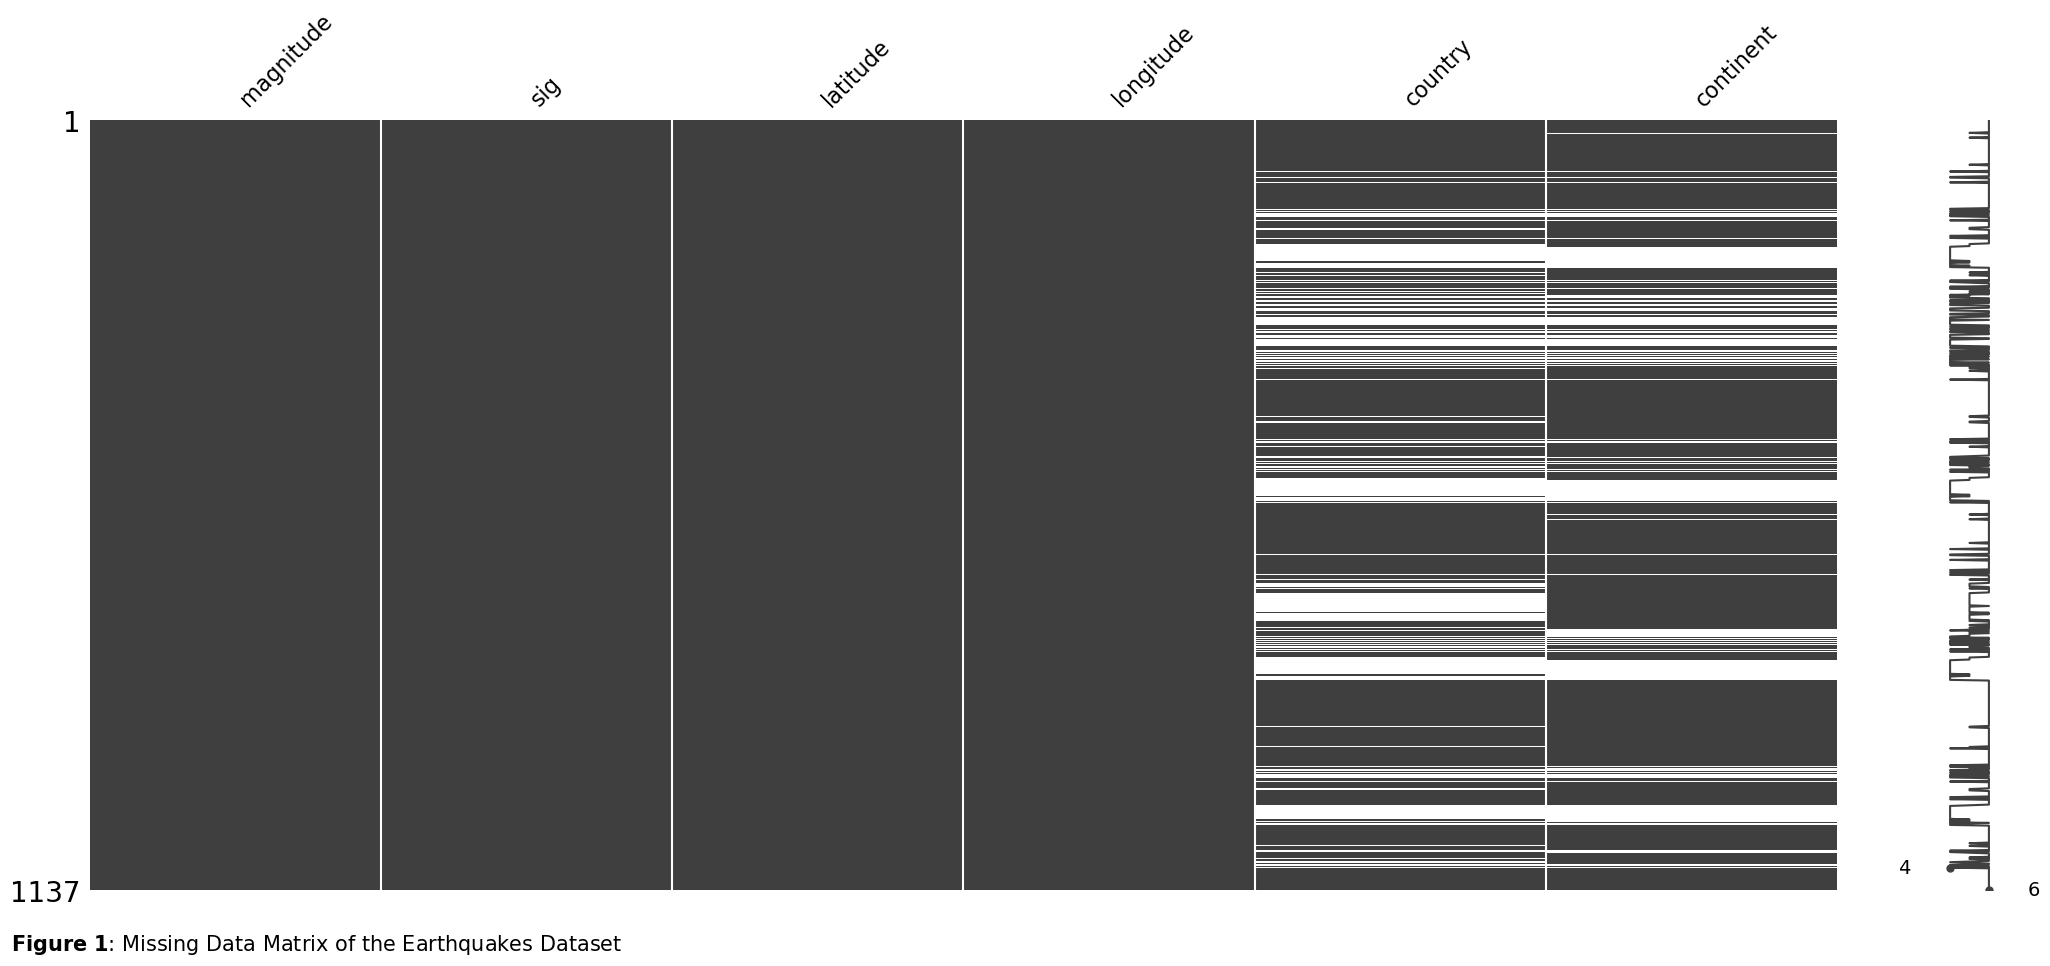

In [3]:
# Selecting only the relevant colunms needed for this analysis
earthquakes_clean = earthquakes[['magnitude', 'sig', 'latitude', 'longitude', 'country', 'continent']]

# Displaying a missing data matrix to check for any missing values 
msno.matrix(earthquakes_clean)

# Add a caption using Matplotlib, making "Figure 1" in bold text
plt.figtext(0.338, 0.05, r"$\bf{Figure\ 1}$: Missing Data Matrix of the Earthquakes Dataset", ha="right", fontsize=15)

# Show the plot with the caption
plt.show()

In the dataset there is a lot of missing data specifying which continent the earthquakes occurred. This missing data will make it difficult to answer the research question. Fortunately, all longitude and latitude data is present, therefore, the following code below will use this to find the continents.
This code has been taken and adapted from Neo (2021).

In [4]:
# Selecting only the relevant colunms needed for this analysis
earthquakes_with_continent = earthquakes[['magnitude', 'sig', 'latitude', 'longitude']]

# Set function to map the code to the corresponding full name of the continent
def get_continent_name(continent_code: str) -> str:
    continent_dict = {
        "NA": "North America",
        "SA": "South America",
        "AS": "Asia",
        "AF": "Africa",
        "OC": "Oceania",
        "EU": "Europe",
        "AQ" : "Antarctica"
    }
    # Return the full continent name corresponding to the input code
    return continent_dict[continent_code]

# Define a function to get the country code and continent name from latitude and longitude
def get_continent(lat: float, lon:float) -> Tuple[str, str]:
    # Initialise a geolocator with a specifed user agent and timeout for the geolocation service.
    geolocator = Nominatim(user_agent="elisdavies16@gmail.com", timeout=10)

    # Set up a rate limiter to prevent overloading the geolocation API with requests
    geocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)

    # Use the geolocation service to get location information for the given latitude and longitude.
    location = geocode(f"{lat}, {lon}", language="en")

    # For cases where the location is not found, this means the earthquake occured out in an ocean, and will be labelled as such
    if location is None:
        return "Ocean", "Ocean"

    # Extract country code
    address = location.raw["address"]
    country_code = address["country_code"].upper()

    # Get continent code from country code
    continent_code = pc.country_alpha2_to_continent_code(country_code)
    continent_name = get_continent_name(continent_code)
    
    # Return both the country code and the continent name
    return country_code, continent_name

# Apply the get_continent function to each row in the DataFrame.
# This populates new columns "country" and "continent" with the respective values from get_continent.
earthquakes_with_continent[["country", "continent"]] = earthquakes_with_continent.progress_apply(
    lambda x: get_continent(x["latitude"], x["longitude"]), axis=1, result_type="expand"
)

100%|██████████| 1137/1137 [09:32<00:00,  1.99it/s]


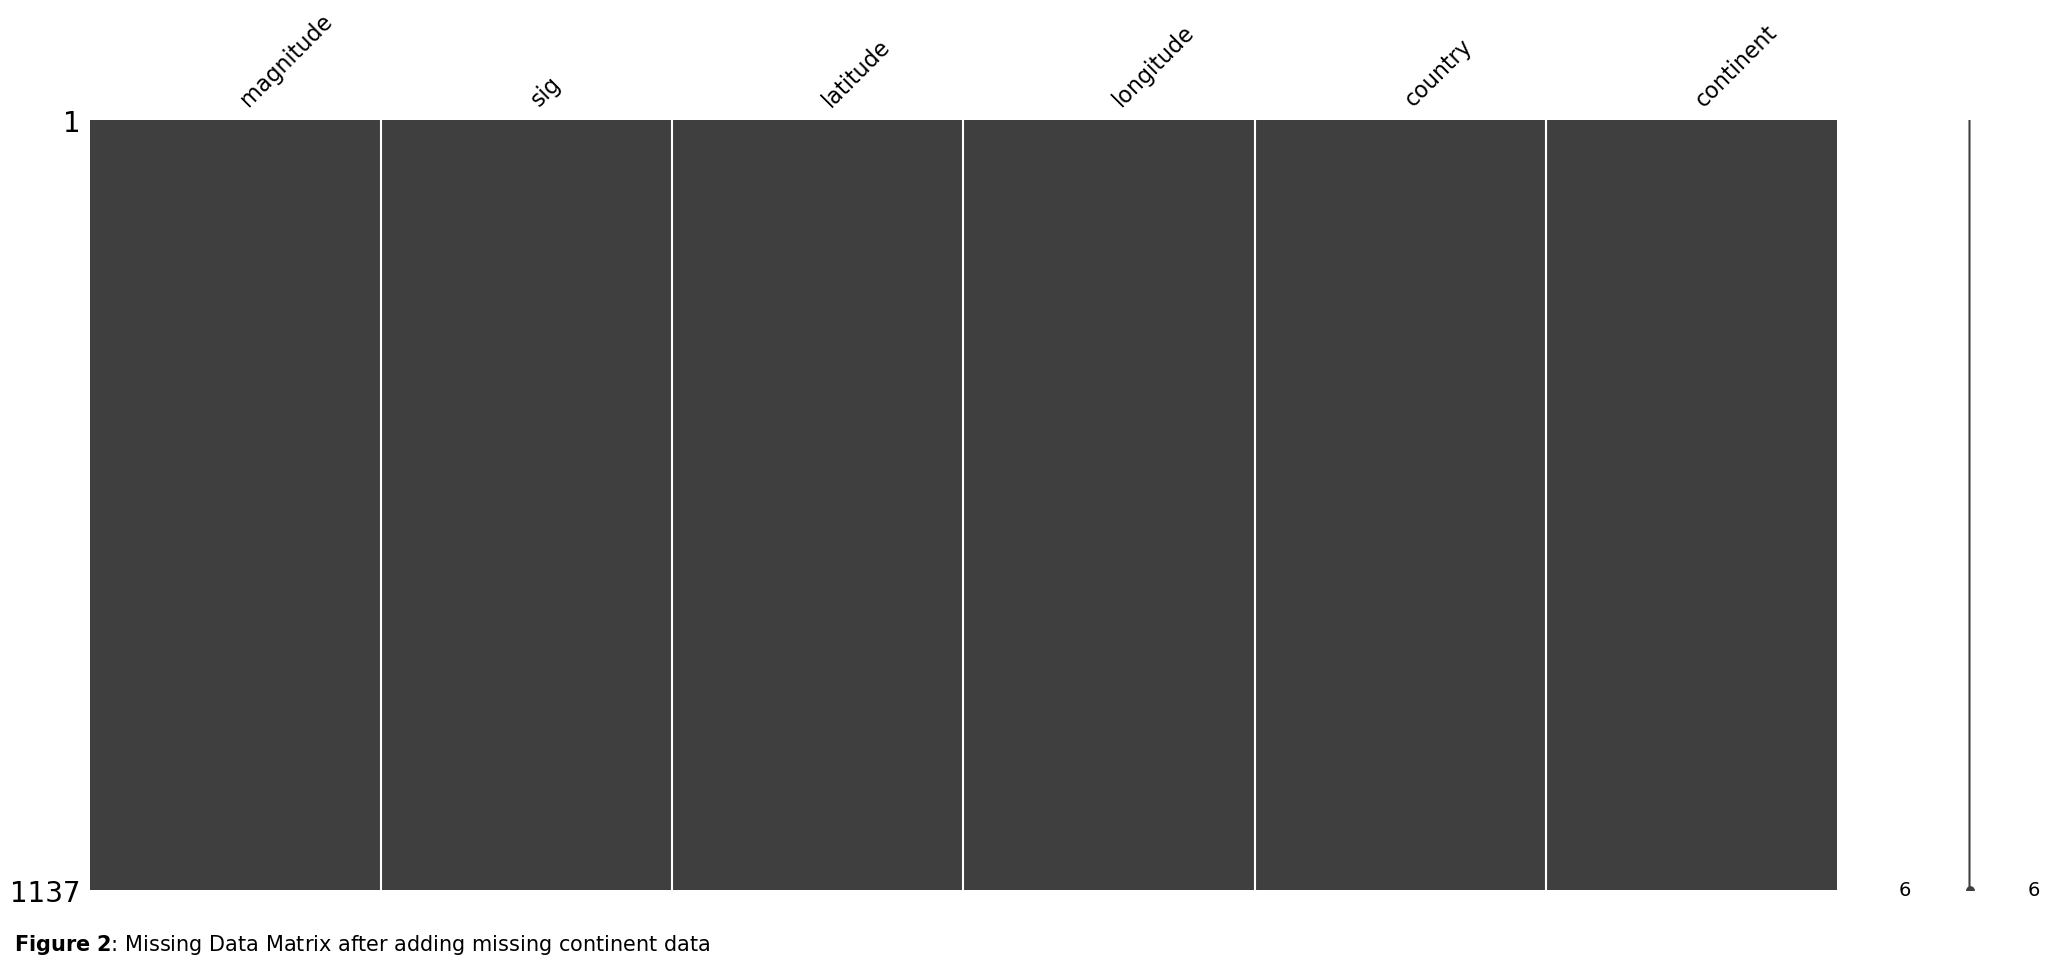

In [5]:
# Displaying a missing data matrix to seee if all countries and continents have now been filled
msno.matrix(earthquakes_with_continent)

# Add a caption using Matplotlib, making "Figure 2" in bold text
plt.figtext(0.373, 0.05, r"$\bf{Figure\ 2}$: Missing Data Matrix after adding missing continent data", ha="right", fontsize=15)

# Show the plot with the caption
plt.show()

Figure 2 shows that the code to fill in all continents has been successful and the dataFrame has no NA values. As mentioned in the introduction, earthquakes that have a magnitude of 5 or greater usually causes damage and destruction to society, therefore, the dataFrame is filtered to only keep these type of magnitude events.

In [6]:
# Find all rows that have a magnitude greater or equal to 5 and store them in a new column called earthquakes_fivePlus
earthquakes_fivePlus = earthquakes_with_continent[earthquakes_with_continent['magnitude'] >= 5]

As this analysis is solely looking at places experiencing direct hazards from earthquakes, all events that occurred out in oceans are excluded.

In [ ]:
# Final all rows that do not have 'Ocean' on its continent column, and save it to a new dataFrame called earthquakes_land
earthquakes_land = earthquakes_fivePlus[earthquakes_fivePlus['continent'] != 'Ocean']

The final data preparation check is to make sure all the data is set the correct type.

In [25]:
print(earthquakes_land.dtypes)

magnitude    float64
sig            int64
latitude     float64
longitude    float64
country       object
continent     object
dtype: object


All columns are set to an appropriate data type; therefore, data analysis is ready to begin.

In [27]:
# Summary statistics
## Magnitude stats
mean_mag = round(earthquakes_land["magnitude"].mean(), 2) # Find the mean, rounding to 2 d.p
med_mag = round(earthquakes_land["magnitude"].median(), 2) # Find the median, rounding to 2 d.p
mode_mag = float(earthquakes_land["magnitude"].mode().iloc[0]) # Find the mode
mode_mag = round(mode_mag, 2) # Round the mode result to 2 d.p
range_mag = round(max(earthquakes_land["magnitude"]) - min(earthquakes_land["magnitude"]), 2) # Find the range, rounding to 2 d.p

## Significance stats
mean_sig = round(earthquakes_land["sig"].mean(), 0) # Find the mean, rounding to 2 d.p
med_sig = round(earthquakes_land["sig"].median(), 0) # Find the median, rounding to 2 d.p
mode_sig = float(earthquakes_land["sig"].mode().iloc[0]) # Find the mode
mode_sig = round(mode_sig, 0) # Round th mode result to 2 d.p
range_sig = round(max(earthquakes_land["sig"]) - min(earthquakes_land["sig"]), 0) # Find the range, rounding to 2 d.p

## Define the column headings
head = [f"\033[1mVariable\033[0m", f"\033[1mMean\033[0m", f"\033[1mMedian\033[0m", 
        f"\033[1mMode\033[0m", f"\033[1mRange\033[0m"]

## Define the row names, with the corresponding stats data
stats_data = [
    [f"\033[1mMagnitude (ML)\033[0m", mean_mag, med_mag, mode_mag, range_mag],
    [f"\033[1mSignificance\033[0m", mean_sig, med_sig, mode_sig, range_sig],
]

## Print the caption with "Table 1" in bold
print("\033[1mTable 1\033[0m: Earthquake Statistics")  # \033[1m for bold, \033[0m to reset

## Print the stats table
print(tabulate(stats_data, headers=head, tablefmt="heavy_grid", numalign="right"))

Table 1: Earthquake Statistics
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓
┃ Variable       ┃   Mean ┃   Median ┃   Mode ┃   Range ┃
┣━━━━━━━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━━┫
┃ Magnitude (ML) ┃    5.7 ┃      5.6 ┃    5.4 ┃     2.6 ┃
┣━━━━━━━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━━┫
┃ Significance   ┃    598 ┃      500 ┃    449 ┃    2034 ┃
┗━━━━━━━━━━━━━━━━┻━━━━━━━━┻━━━━━━━━━━┻━━━━━━━━┻━━━━━━━━━┛


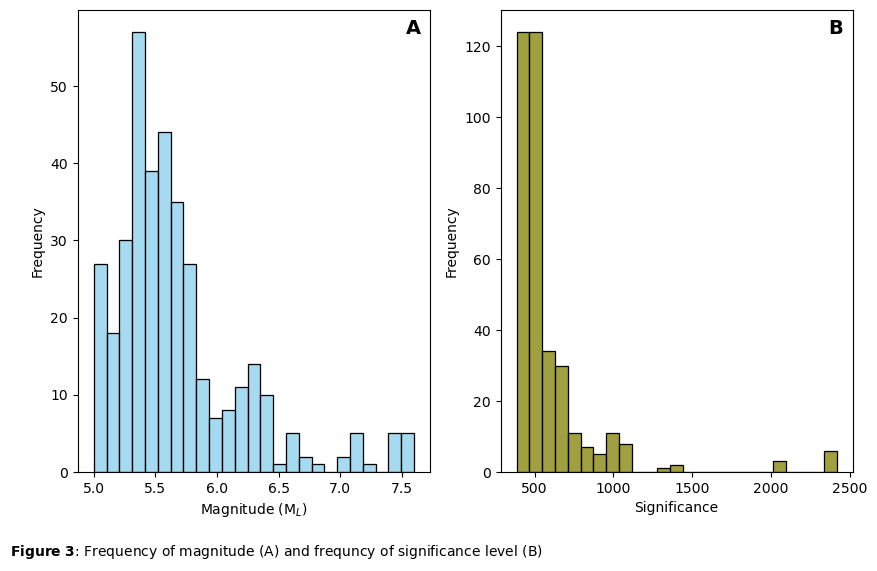

In [64]:
# Set the plot to have 1 row and 2 plots, and set the figure size
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plot the first histogram on the first subplot (left side)
sns.histplot(data=earthquakes_land, x='magnitude', color="skyblue", ax=axs[0], bins = 25)
axs[0].set_xlabel("Magnitude (M$_L$)") # Set x axis label
axs[0].set_ylabel("Frequency") # Set y axis label

# Add "A" label in the top-left corner of the first subplot
axs[0].annotate("A", xy=(0.93, 0.98), xycoords="axes fraction", ha="left", va="top", fontsize=14, fontweight="bold")

# Plot the second histogram on the second subplot (right side)
sns.histplot(data=earthquakes_land, x='sig', color="olive", ax=axs[1], bins = 25)
axs[1].set_xlabel("Significance") # Set x axis label
axs[1].set_ylabel("Frequency") # Set y axis label

# Bin counts for both histograms have been set to 25 as this gives enough details for both variables to spot overall trend,
# and with the same bin count enables easier comparison between the two.

# Add "B" label in the top-left corner of the second subplot
axs[1].annotate("B", xy=(0.93, 0.98), xycoords="axes fraction", ha="left", va="top", fontsize=14, fontweight="bold")

# Add figure caption
plt.figtext(0.59, -0.03, r"$\bf{Figure\ 3}$: Frequency of magnitude (A) and frequncy of significance level (B)", ha="right", fontsize=10)
# Show the figure
plt.show()

The distribution of earthquake magnitude shows a positive skew, with most values clustered between 5.0 and 6.0 M~L~ (Figure 3A). The mean magnitude is 5.7, slightly above the median of 5.6 (Table 1), indicating a slight skew towards the higher magnitudes. The most frequent magnitude is 5.4  M~L~, and the range of magnitudes extends from 5.0 to 7.5 M~L~, though higher magnitudes are relatively rare.
Figure 3B displays the earthquake's significance scores, which are heavily concentrated at lower values below 600. The mean significance of 598 is higher than the median of 500 (Table 1), highlight a strong right skew (Figure 3B), with a few earthquakes reaching high significance levels above 1,000. The mode of 449 supports this. The large range of 2034 points to occasional highly significant events, reflected by outliers on the far right of the histogram.

In [29]:
# Group by 'continent' and count the occurrences
continent_counts = earthquakes_land['continent'].value_counts()

# Define headers for the table
head = [f"\033[1mContinent\033[0m", f"\033[1mNumber of earthquake events\033[0m"]

# Prepare data for each row in the table
counts_data = [[f"\033[1m{continent}\033[0m", count] for continent, count in continent_counts.items()]

# Print the caption with "Table 2" in bold
print("\033[1mTable 2\033[0m: Earthquake counts by continent")

# Print the table with counts
print(tabulate(counts_data, headers=head, tablefmt="heavy_grid", numalign="right"))

Table 2: Earthquake counts by continent
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Continent     ┃   Number of earthquake events ┃
┣━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ Asia          ┃                           265 ┃
┣━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ South America ┃                            74 ┃
┣━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ North America ┃                            18 ┃
┣━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ Europe        ┃                             4 ┃
┣━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ Africa        ┃                             3 ┃
┣━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ Oceania       ┃                             2 ┃
┗━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛


Between June 2023 and September 2024, Asia saw the greatest number of earthquakes over 5M~L~ (72%), with Europe, Africa, and Oceania experiencing only <1% of the total number each (Table 2). Asia has some of the most complex and high number of active tectonic boundaries, which explains its lead in the number of events (Gao, Ma, Li, 2011).

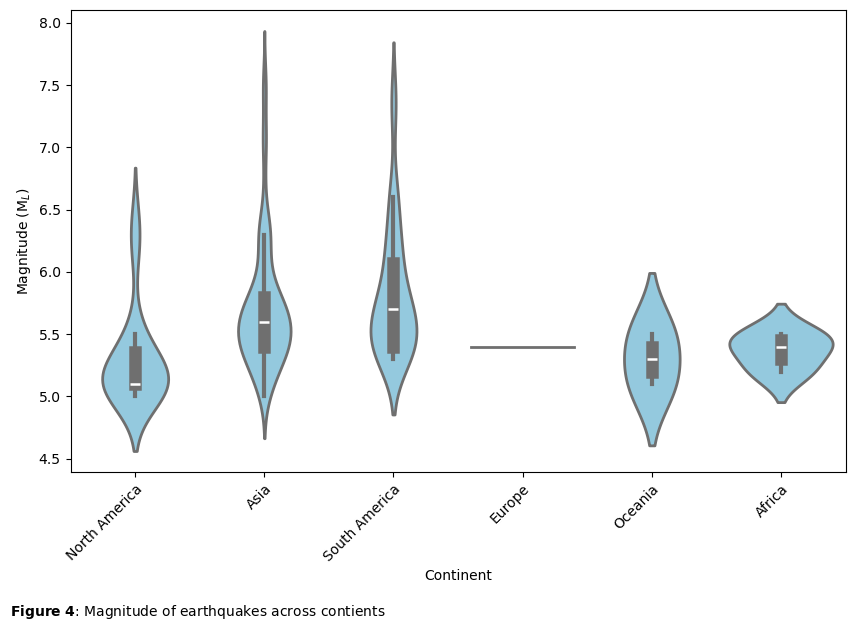

In [31]:
# Set plot size
plt.figure(figsize=(10, 6))
# Plot violin plot for magnitude
sns.violinplot(data = earthquakes_land, x="continent", y="magnitude", linewidth = 2, color = "skyblue")

# Set x axis label
plt.xlabel("Continent")
# Set the x axis ticks
plt.xticks(rotation = 45, ha = 'right', wrap = True)

# Set y axis label
plt.ylabel("Magnitude (M$_L$)")

# Set figure caption
plt.figtext(0.44, -0.13, r"$\bf{Figure\ 4}$: Magnitude of earthquakes across contients", ha="right", fontsize=10)

# Display plot
plt.show()

In North America the magnitudes are primarily clustered between 5.0 and 5.5 M~L~. Asia and South America exhibit a wider range and greater density of higher magnitudes, with median values just above 5.5 M~L~ and occasional events approaching 7.5. Oceania and Africa have more compact distributions, with medians around 5.25 M~L~ and fewer instances of high-magnitude events. Europe's line in the figure suggests consistent recordings of 5.4 M~L~ across its 4 events (Figure 4).

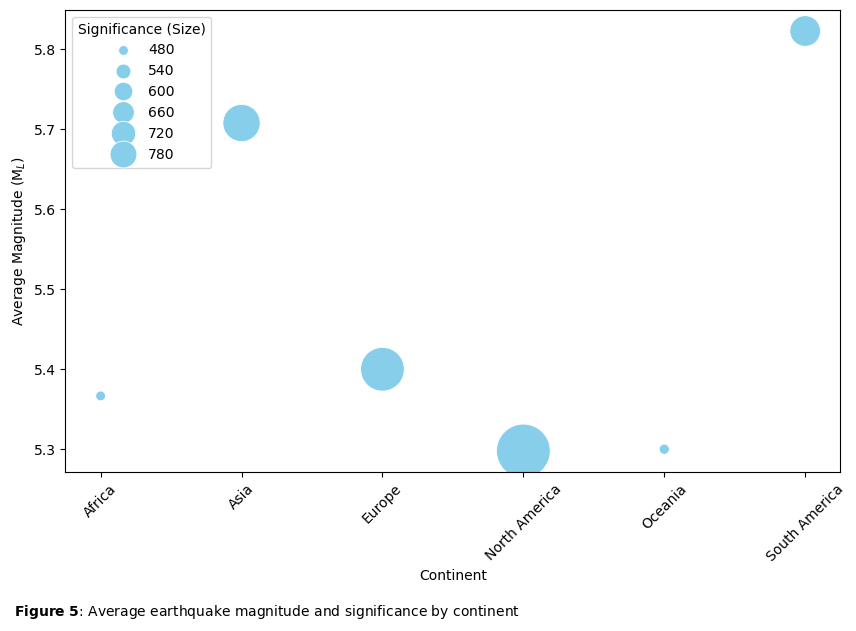

In [83]:
# Group magitude and significance data by contient
summary = earthquakes_land.groupby('continent').agg({
    'magnitude': 'mean',   # Average magnitude per continent
    'sig': 'mean'         # Average 'felt' per continent
}).reset_index()

# Set figure size
plt.figure(figsize=(10, 6))
# Define the scatter plot
sns.scatterplot(
    data=summary,
    x='continent',
    y='magnitude',
    size='sig', # Bubble size based on 'felt' variable
    sizes = (50, 1500), # Define the upper and lower sizes for the bubbles
    color = "skyblue",
    legend='brief' # Rounds the numbers in legend to 0 d.p.
)

# Set the legend, with matlabl deciding the best place for it
plt.legend(title="Significance (Size)", loc='best', markerscale=0.5)

# Set x axis label
plt.xlabel("Continent")
# Set y axis label
plt.ylabel("Average Magnitude (M$_L$)")
# Set x axis tick marks
plt.xticks(rotation=45)
# Turn of graph's grid lines
plt.grid(False)
# Set figure caption
plt.figtext(0.58, -0.13, r"$\bf{Figure\ 5}$: Average earthquake magnitude and significance by continent", ha="right", fontsize=10)


# Show plot
plt.show()

From Figure 5, South America has a higher average earthquake magnitude, suggesting frequent stronger seismic activity. North America, however, has the lowest average earthquake magnitude, but displays the largest bubble. This suggests that the earthquakes, although moderate in magnitude, likely occurred near populated areas, increasing their significance and impact.

Asia, with both a relatively high average magnitude (around 5.7) and a larger bubble, reflects impactful earthquakes, potentially near populated areas. Europe also shows moderate magnitudes and a noticeable bubble size, implying that while the earthquakes are not exceptionally strong, they still have a significant impact, possibly due to proximity to inhabited regions. Africa and Oceania, with both lower average magnitudes and smaller bubble sizes, indicate less impactful earthquakes, likely occurring in sparsely populated regions.

## Conclusion
This analysis highlights notable regional differences in earthquake magnitudes and significance. South America recorded the highest average magnitudes, reflecting frequent, strong seismic events. In contrast, North America had lower average magnitudes, yet earthquakes there often had high significance, likely due to proximity to populated areas. Asia's elevated magnitudes and significance suggest impactful seismic activity, particularly near high-density regions. Europe's low number of events, but, moderate magnitudes still showed significant impacts indicating that even mid-sized tremors can be consequential when close to population centres.

These findings align with previous research, as even with only four events in this time frame for Europe, the significance ranks highly. It has been suggested that areas in Europe, place less focus on proactive measures like planning, skill acquisition, and structural mitigation (Pereira, Mónico, & Rego, 2024). In comparison, Asia has the highest number of earthquake events compared to other continents (Dou *et al.*, 2018), yet countries like Japan, have been coined as the 'gold standard' in preparedness for earthquakes (Edgington, 2022), which might explain its lower significance.

The analysis implies a need for heightened earthquake preparedness in regions with significant seismic activity, especially in high-density areas. Enhanced  early warning systems, strict building codes, and community preparedness efforts are vital for reduced significance levels.

Limitations of this study include the short, one-year date span, which will not reflect long-term trends. Also, the dataset's significance scores, do not capture all factors influencing earthquakes impacts, such as infrastructure resilience, and the distance from populated areas were not studied. Future research could expand this scope by analysing longer-term data and including variables like population density and infrastructure quality.

## Bibliography

Cassidy, J. F. (2013) 'Earthquake', in Bobrowsky, P.T. (ed.) Encyclopedia of Natural Hazards. Dordrecht: Springer Netherlands, pp. 208-22. 101306.



Contreras Mojica, D., Wilkinson, S. and James, P. (2021) Earthquakes Reconnaissance Data Sources, a Literature Review.

Dou, Y., Huang, Q., He, C., Meng, S. and Zhang, Q. (2018) 'Rapid Population Growth throughout Asia's Earthquake-Prone Areas: A Multiscale Analysis', Int J Environ Res Public Health, 15(9).

Edgington, D. W. (2022) 'Planning for Earthquakes and Tsunamis: Lessons from Japan for British Columbia, Canada', Progress in Planning, 163, pp. 100626.


Gao, X., Ma, X. and Li, X. (2011) 'The great triangular seismic region in eastern Asia: Thoughts on its dynamic context', Geoscience Frontiers, 2(1), pp. 57-65.


Jain, S. (2014) 'Earthquakes', in Jain, S. (ed.) Fundamentals of Physical Geology. New Delhi: Springer India, pp. 337-369.


Krichen, M., Abdalzaher, M. S., Elwekeil, M. and Fouda, M. M. (2024) 'Managing natural disasters: An analysis of technological advancements, opportunities, and challenges', Internet of Things and Cyber-Physical Systems, 4, pp. 99-109.


Neo, B. (2022) Get Continent Names from Coordinates Using Python. Available at: https://medium.com/bitgrit-data-science-publication/get-continent-names-from-coordinates-using-python-8560cdcfdfbb (Accessed: 17th October 2024).


Pereira, S. M., Mónico, L. d. S. M. and Rego, I. E. (2024) 'Earthquake recommendations in Europe: Types and diversity', Environmental Science & Policy, 156, pp. 103732.

Tang, B., Chen, Q., Liu, X., Liu, Z., Liu, Y., Dong, J. and Zhang, L. (2019) 'Rapid estimation of earthquake fatalities in China using an empirical regression method', International Journal of Disaster Risk Reduction, 41, pp. 101306.